# Analys of Traffic Accidents  and Venues in Bogota

Installation of Packages

In [1]:
!conda install -c conda-forge scikit-learn --yes
!conda install -c anaconda scipy
!conda install -c conda-forge folium=0.5.0 --yes
print("packages installed")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    blas-1.1                   |         openblas           1 KB  conda-forge
    scipy-1.1.0                |py35_blas_openblash7943236_201        40.1 MB  conda-forge
    libgfortran-3.0.0          |                1         281 KB  conda-forge
    openblas-0.2.20            |                8        17.0 MB  conda-forge
    numpy-1.13.3               |py35_blas_openblas_201         8.7 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    numexpr-2.6.6              |   py35h470a237_1         419 KB  

Libraries imported

In [2]:
import pandas as pd
import requests
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data Collection through Foursquare

In [3]:
# Bogota's boroughs
dic = {1:['Usaquen',4.723275, -74.036574],2:['Chapinero',4.660363, -74.053383],3:['Santa Fe',4.609981, -74.069833],
       4:['San Cristobal',4.562843, -74.089615],5:['Usme',4.5064, -74.1080],6:['Tunjuelito',4.583216, -74.137272],7:['Bosa',4.623055, -74.195987],
      8:['Kennedy',4.627078, -74.151358],9:['Fontibon',4.676155, -74.136057],10:['Engativa',4.700832, -74.109040],11:['Suba',4.741, -74.084],
      12:['Barrios Unidos',4.670186, -74.073411],13:['Teusaquillo',4.639346, -74.077037],14:['Los Martires',4.606241, -74.089889],
       15:['Antonio Nariño',4.587906, -74.099494],16:['Puente Aranda',4.613310, -74.114055],17:['La Candelaria',4.597014, -74.072150],
       18:['Rafael Uribe Uribe',4.572363, -74.114523],19:['Ciudad Bolivar',4.536111, -74.138889],20:['Sumapaz',4.26, -74.178333]}

bogota_data = pd.DataFrame.from_dict(dic, orient='index')
bogota_data.columns=['Borough', 'Latitude', 'Longitude']
bogota_data

,Borough,Latitude,Longitude
1,Usaquen,4.723275,-74.036574
2,Chapinero,4.660363,-74.053383
3,Santa Fe,4.609981,-74.069833
4,San Cristobal,4.562843,-74.089615
5,Usme,4.506400,-74.108000
6,Tunjuelito,4.583216,-74.137272
7,Bosa,4.623055,-74.195987
8,Kennedy,4.627078,-74.151358
9,Fontibon,4.676155,-74.136057
10,Engativa,4.700832,-74.109040


In [8]:
# @hidden_cell
# Foursquare's credentials
CLIENT_ID = 'CWTHDGFKNR3CGR5JFBF1UNFCTUWOP0I4AZDIHDUHF0HX1DMS' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [9]:
# Search params
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2500 # define radius

In [10]:
# Method for get venues of each borough

def getNearbyVenues(names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
# Gathering of data from Foursquare

bogota_venues = getNearbyVenues(names=bogota_data['Borough'],
                                   latitudes=bogota_data['Latitude'],
                                   longitudes=bogota_data['Longitude']
                                  )
print(bogota_venues.shape)
bogota_venues.head()



Usaquen
Chapinero
Santa Fe
San Cristobal
Usme
Tunjuelito
Bosa
Kennedy
Fontibon
Engativa
Suba
Barrios Unidos
Teusaquillo
Los Martires
Antonio Nariño
Puente Aranda
La Candelaria
Rafael Uribe Uribe
Ciudad Bolivar
Sumapaz
(1544, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Usaquen,4.723275,-74.036574,Wok,4.719637,-74.037489,Asian Restaurant
1,Usaquen,4.723275,-74.036574,El Kiosco golosinas,4.722658,-74.034035,Snack Place
2,Usaquen,4.723275,-74.036574,Chopinar,4.724496,-74.032496,Buffet
3,Usaquen,4.723275,-74.036574,Parque Cedritos,4.723525,-74.033089,Park
4,Usaquen,4.723275,-74.036574,Harvey,4.726911,-74.035721,Fast Food Restaurant


In [12]:
# Counting on each borough to check how many venues was returned
bogota_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Antonio Nariño,100,100,100,100,100,100
Barrios Unidos,100,100,100,100,100,100
Bosa,18,18,18,18,18,18
Chapinero,100,100,100,100,100,100
Ciudad Bolivar,8,8,8,8,8,8
Engativa,100,100,100,100,100,100
Fontibon,100,100,100,100,100,100
Kennedy,87,87,87,87,87,87
La Candelaria,100,100,100,100,100,100


In [13]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Borough'] = bogota_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Borough,Airport,Airport Lounge,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Thai Restaurant,Theater,Toy / Game Store,Trade School,University,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Wings Joint,Women's Store
0,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Some boroughs don't have enough data. they were droped
bogota_onehot = bogota_onehot[bogota_onehot['Borough'] != 'Bosa']
bogota_onehot = bogota_onehot[bogota_onehot['Borough'] != 'Ciudad Bolivar']
bogota_onehot = bogota_onehot[bogota_onehot['Borough'] != 'San Cristobal']
bogota_onehot = bogota_onehot[bogota_onehot['Borough'] != 'Usme']
bogota_onehot

,Borough,Airport,Airport Lounge,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Thai Restaurant,Theater,Toy / Game Store,Trade School,University,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Wings Joint,Women's Store
0,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Usaquen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# On this stage I calculated mean of each venue by agrupation of boroughs

bogota_grouped = bogota_onehot.groupby('Borough').mean().reset_index()
bogota_grouped
bogota_grouped.shape

(15, 171)

In [16]:
# Analysis of top 10 venues. It means how frequent is each venue on each borough

num_top_venues = 10

for hood in bogota_grouped['Borough']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antonio Nariño----
                       venue  freq
0                 Restaurant  0.10
1                       Café  0.07
2                Pizza Place  0.05
3                       Park  0.05
4             History Museum  0.04
5  Latin American Restaurant  0.03
6         Seafood Restaurant  0.03
7                Coffee Shop  0.03
8  South American Restaurant  0.03
9              Bowling Alley  0.02


----Barrios Unidos----
                       venue  freq
0                 Restaurant  0.08
1                      Hotel  0.06
2                Coffee Shop  0.05
3  Latin American Restaurant  0.05
4                     Bakery  0.05
5         Seafood Restaurant  0.03
6         Italian Restaurant  0.03
7           Asian Restaurant  0.03
8                Pizza Place  0.03
9                        Gym  0.02


----Chapinero----
                           venue  freq
0                          Hotel  0.08
1                    Coffee Shop  0.08
2                     Restaurant  0.08
3     

In [17]:
# Method that return most common venues. Params are iter and number of top venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = bogota_grouped['Borough']

for ind in np.arange(bogota_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Antonio Nariño,Restaurant,Café,Park,Pizza Place,History Museum,Latin American Restaurant,Coffee Shop,Seafood Restaurant,South American Restaurant,French Restaurant,Gym,Hotel,Pub,Plaza,Historic Site
1,Barrios Unidos,Restaurant,Hotel,Coffee Shop,Latin American Restaurant,Bakery,Italian Restaurant,Seafood Restaurant,Pizza Place,Asian Restaurant,Café,Park,Lounge,Bowling Alley,Wings Joint,Gym
2,Chapinero,Restaurant,Hotel,Coffee Shop,Bakery,Italian Restaurant,French Restaurant,Latin American Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Pizza Place,BBQ Joint,Pub,Wings Joint,Breakfast Spot
3,Engativa,Hotel,Restaurant,Bakery,Pizza Place,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,Bar,Café,Park,Latin American Restaurant,Brewery,Seafood Restaurant,Clothing Store,Cocktail Bar
4,Fontibon,Coffee Shop,Hotel,Pizza Place,Italian Restaurant,Restaurant,Bakery,Café,Gym,Ice Cream Shop,Seafood Restaurant,Sushi Restaurant,Burger Joint,Mexican Restaurant,Wings Joint,Pub
5,Kennedy,Burger Joint,Sandwich Place,Restaurant,BBQ Joint,Shopping Mall,Park,Fast Food Restaurant,Coffee Shop,Pizza Place,Clothing Store,Movie Theater,Steakhouse,Mexican Restaurant,Bakery,Hot Dog Joint
6,La Candelaria,Restaurant,Café,History Museum,Burger Joint,Italian Restaurant,Coffee Shop,Hotel,French Restaurant,Plaza,Asian Restaurant,Nightclub,Comfort Food Restaurant,South American Restaurant,Latin American Restaurant,BBQ Joint
7,Los Martires,Restaurant,Café,History Museum,Italian Restaurant,Latin American Restaurant,Coffee Shop,Theater,Bakery,Burger Joint,Nightclub,Historic Site,Bookstore,Pub,Seafood Restaurant,Plaza
8,Puente Aranda,Restaurant,Hotel,Coffee Shop,Bakery,Latin American Restaurant,French Restaurant,Pizza Place,Bar,Seafood Restaurant,BBQ Joint,Sandwich Place,Park,Burger Joint,Mexican Restaurant,Creperie
9,Rafael Uribe Uribe,Pizza Place,Park,Sandwich Place,Department Store,Burger Joint,BBQ Joint,Mexican Restaurant,Seafood Restaurant,Restaurant,Convenience Store,Fast Food Restaurant,Fried Chicken Joint,Bar,Food Court,Donut Shop


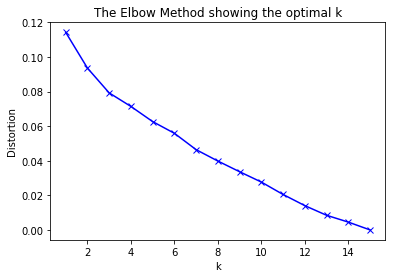

In [19]:
#!conda update numpy

# It is necessary calculate de number of cluster for K-means 

distortions = []
K = range(1,16)

bogota_grouped_clustering = bogota_grouped.drop('Borough', 1)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(bogota_grouped_clustering)
    kmeanModel.fit(bogota_grouped_clustering)
    distortions.append(sum(np.min(cdist(bogota_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / bogota_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:

# set number of clusters
kclusters = 4

bogota_grouped_clustering = bogota_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 1, 0, 2, 2, 1, 3], dtype=int32)

In [21]:
# add clustering labels
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#borough_venues_sorted = borough_venues_sorted.drop('Cluster Labels', 1)
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_merged = bogota_data

# merge bogota_grouped with bogota_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')
bogota_merged = bogota_merged[bogota_merged['Borough'] != 'Sumapaz']
bogota_merged = bogota_merged[bogota_merged['Borough'] != 'Bosa']
bogota_merged = bogota_merged[bogota_merged['Borough'] != 'Ciudad Bolivar']
bogota_merged = bogota_merged[bogota_merged['Borough'] != 'San Cristobal']
bogota_merged = bogota_merged[bogota_merged['Borough'] != 'Usme']

bogota_merged # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Usaquen,4.723275,-74.036574,0.0,Dessert Shop,Park,Spa,Brewery,Burger Joint,Asian Restaurant,Coffee Shop,Bakery,Supermarket,Wings Joint,Ice Cream Shop,Bed & Breakfast,Pharmacy,Hotel,Italian Restaurant
2,Chapinero,4.660363,-74.053383,1.0,Restaurant,Hotel,Coffee Shop,Bakery,Italian Restaurant,French Restaurant,Latin American Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Pizza Place,BBQ Joint,Pub,Wings Joint,Breakfast Spot
3,Santa Fe,4.609981,-74.069833,2.0,Restaurant,Café,Italian Restaurant,Burger Joint,Coffee Shop,History Museum,Art Museum,Latin American Restaurant,Bar,BBQ Joint,French Restaurant,Bookstore,Nightclub,Pub,Plaza
6,Tunjuelito,4.583216,-74.137272,3.0,Park,Burger Joint,Fast Food Restaurant,Seafood Restaurant,BBQ Joint,Pizza Place,Restaurant,Bar,Department Store,Gym / Fitness Center,Latin American Restaurant,Mexican Restaurant,Convenience Store,Fried Chicken Joint,Coffee Shop
8,Kennedy,4.627078,-74.151358,0.0,Burger Joint,Sandwich Place,Restaurant,BBQ Joint,Shopping Mall,Park,Fast Food Restaurant,Coffee Shop,Pizza Place,Clothing Store,Movie Theater,Steakhouse,Mexican Restaurant,Bakery,Hot Dog Joint
9,Fontibon,4.676155,-74.136057,1.0,Coffee Shop,Hotel,Pizza Place,Italian Restaurant,Restaurant,Bakery,Café,Gym,Ice Cream Shop,Seafood Restaurant,Sushi Restaurant,Burger Joint,Mexican Restaurant,Wings Joint,Pub
10,Engativa,4.700832,-74.109040,1.0,Hotel,Restaurant,Bakery,Pizza Place,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,Bar,Café,Park,Latin American Restaurant,Brewery,Seafood Restaurant,Clothing Store,Cocktail Bar
11,Suba,4.741000,-74.084000,0.0,Pizza Place,Movie Theater,Restaurant,Burger Joint,Gym,Coffee Shop,Park,Recreation Center,Café,Creperie,Mexican Restaurant,Paper / Office Supplies Store,Fast Food Restaurant,Shopping Mall,Italian Restaurant
12,Barrios Unidos,4.670186,-74.073411,1.0,Restaurant,Hotel,Coffee Shop,Latin American Restaurant,Bakery,Italian Restaurant,Seafood Restaurant,Pizza Place,Asian Restaurant,Café,Park,Lounge,Bowling Alley,Wings Joint,Gym
13,Teusaquillo,4.639346,-74.077037,1.0,Restaurant,Coffee Shop,Bakery,Café,Vegetarian / Vegan Restaurant,Park,Latin American Restaurant,Italian Restaurant,French Restaurant,Pizza Place,Asian Restaurant,Bowling Alley,Gym / Fitness Center,Mexican Restaurant,Hotel


In [22]:
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors# Matplotlib and associated plotting modules

clusters = 4

# create map
map_clusters = folium.Map(location=[4.7110, -74.0721], zoom_start=10) 

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [23]:
# Map of how K-means agrouped each borough

for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['Borough'], bogota_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [24]:
# Import csv file from object storage
!wget -O bogota_accidents.csv https://s3-api.us-geo.objectstorage.softlayer.net/fna-bucket/bogota.csv
bogota_accidents = pd.read_csv('bogota_accidents.csv')
bogota_accidents.head()

--2019-05-05 00:18:52--  https://s3-api.us-geo.objectstorage.softlayer.net/fna-bucket/bogota.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3640084 (3.5M) [application/octet-stream]
Saving to: ‘bogota_accidents.csv’

100%[======================================>] 3,640,084   --.-K/s   in 0.1s    

2019-05-05 00:18:52 (24.1 MB/s) - ‘bogota_accidents.csv’ saved [3640084/3640084]



,Día,Fecha,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,Municipio,Localidad,FechaOcurrencia,HoraOcurrencia
0,SÁBADO,4/29/17 0:00,2,Con Heridos,2,Atropello,BOGOTA D.C.,FONTIBON,4/29/17 0:00,12/31/1899 03:40:00 PM
1,SÁBADO,5/6/17 0:00,2,Con Heridos,2,Atropello,BOGOTA D.C.,KENNEDY,5/6/17 0:00,12/31/1899 03:15:00 AM
2,DOMINGO,5/7/17 0:00,1,Con Muertos,2,Atropello,BOGOTA D.C.,KENNEDY,5/7/17 0:00,12/31/1899 04:40:00 AM
3,VIERNES,5/5/17 0:00,3,Solo Daños,3,Volcamiento,BOGOTA D.C.,BARRIOS UNIDOS,5/5/17 0:00,12/31/1899 02:00:00 PM
4,DOMINGO,4/9/17 0:00,1,Con Muertos,2,Atropello,BOGOTA D.C.,TUNJUELITO,4/9/17 0:00,12/31/1899 12:38:00 AM


In [25]:
# Droping all unnecessary attributes 
bogota_accidents = bogota_accidents.drop('Fecha', 1)
bogota_accidents = bogota_accidents.drop('ClaseCodigo', 1)
bogota_accidents = bogota_accidents.drop('Municipio', 1)
bogota_accidents = bogota_accidents.drop('FechaOcurrencia', 1)
bogota_accidents = bogota_accidents.drop('HoraOcurrencia', 1)
bogota_accidents = bogota_accidents.drop('Día', 1)
bogota_accidents.head()

,GravedadCod,GravedadNombre,ClaseNombre,Localidad
0,2,Con Heridos,Atropello,FONTIBON
1,2,Con Heridos,Atropello,KENNEDY
2,1,Con Muertos,Atropello,KENNEDY
3,3,Solo Daños,Volcamiento,BARRIOS UNIDOS
4,1,Con Muertos,Atropello,TUNJUELITO


In [26]:
# Counting of number of accidents on each borough
g = bogota_accidents['Localidad'].value_counts()
g.head(10)

KENNEDY           4114
USAQUEN           3766
ENGATIVA          3592
SUBA              3073
FONTIBON          2821
PUENTE ARANDA     2415
CHAPINERO         2011
BARRIOS UNIDOS    2001
TEUSAQUILLO       1934
BOSA              1634
Name: Localidad, dtype: int64

In [27]:
# Capitaliza method
def capitalize (string):
    return str.capitalize(string)

In [28]:
# Inicialization of new dataframe and standarization of boroughs' name
df2 = g.to_frame().reset_index()
df2.columns=['Borough','Quantity of Accidents']
df2.sort_index(axis = 0, ascending=True)
df2['Borough'] = df2['Borough'].apply(capitalize)
df2.head()

,Borough,Quantity of Accidents
0,Kennedy,4114
1,Usaquen,3766
2,Engativa,3592
3,Suba,3073
4,Fontibon,2821


Analysis Section

In [31]:
# Import of geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/fna-bucket/localidades_bogota.geojson -O localidades_bogota.geojson

world_geo = r'localidades_bogota.geojson' # geojson file

df2.head()

# create a numpy array of length 6 and has linear spacing from the minium total traffic accidents to the maximum traffic accidents
threshold_scale = np.linspace(df2['Quantity of Accidents'].min(),
                              df2['Quantity of Accidents'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the traffic accidents


# create a plain bogota's map
map_clusters = folium.Map(location=[4.624335, -74.063644], zoom_start=10)
map_clusters.choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['Borough', 'Quantity of Accidents'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Accidents',
    #reset=True
)
# Cluster map
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['Borough'], bogota_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters